In [120]:
from scipy.io import loadmat
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from tqdm import tqdm_notebook


class ICA:
    def __init__(self, sounds):
        self.Usounds = sounds
        self.normU = normalize(self.Usounds, norm='l2', axis=0)
        self.nsources = self.Usounds.shape[0]
        self.timesteps = self.Usounds.shape[1]
        self.A = np.random.rand(self.nsources, self.nsources)
        self.A = normalize(self.A, norm='l2', axis=1)
        self.Msounds = self.A.dot(self.Usounds)
        self.W = np.random.uniform(low=0, high=0.1, size=(self.nsources, self.nsources))
        self.Y = self.W.dot(self.Msounds)
        self.Z = np.reciprocal(1 + np.exp(-self.Y))

        self.delW = self.W

        # Initializing results
        self.itr = []
        self.corr = np.empty((0, self.nsources))
        self.max = 1

    def do_ICA(self, eta, max_itr):

        # Main Loop
        
        for k in tqdm_notebook(range(max_itr)):
            

            self.delW = eta * (self.timesteps * np.identity(self.nsources) + (1 - 2 * self.Z).dot(np.transpose(self.Y))).dot(
                self.W)

                    
            self.W = self.W + self.delW
            self.Y = self.W.dot(self.Msounds)
            self.Z = np.reciprocal(1 + np.exp(-self.Y))
            
            # Evaluating correaltion for every loop
            Ynorm = normalize(self.Y, norm='l2', axis=0)
            Unorm = self.normU
            c = []
            nsources = self.nsources
            for i in range(nsources):
                temp = []
                for j in range(nsources):
                    temp.append(np.absolute(np.corrcoef(Unorm[i,:], Ynorm[j, :]))[0, 1])

                c.append(max(temp))
                
            self.max = min(c)

            self.corr = np.append(self.corr, np.asarray([c]), axis=0)
            self.itr = k
            #exit condition
            if self.max > 0.95:
                print("Early Convergance!!")
                break

        print("Converged")

    def plotsignals(self):

        t = range(self.timesteps)
        Y = self.Y
        U = self.Usounds
        X = self.Msounds
        itr = self.itr
        C = self.corr
        # Plotting the output
        plt.figure()
        plt.subplot(511)
        plt.plot(t, Y[0, :], color='b')
        plt.subplot(512)
        plt.plot(t, Y[1, :], color='g')
        plt.subplot(513)
        plt.plot(t, Y[2, :], color='r')
        plt.subplot(514)
        plt.plot(t, Y[3, :], color='c')
        plt.subplot(515)
        plt.plot(t, Y[4, :], color='m')
        plt.xlabel('Retrieved Sounds')
        plt.savefig('Retrieved_Sounds')

        # Actual sound
        plt.figure()
        plt.subplot(511)
        plt.plot(t, U[0, :], color='b')
        plt.subplot(512)
        plt.plot(t, U[1, :], color='g')
        plt.subplot(513)
        plt.plot(t, U[2, :], color='r')
        plt.subplot(514)
        plt.plot(t, U[3, :], color='c')
        plt.subplot(515)
        plt.plot(t, U[4, :], color='m')
        plt.xlabel('Actual Sounds')
        plt.savefig('Actual Sounds')

            # Plotting the Mixed
        plt.figure()
        plt.subplot(511)
        plt.plot(t, X[0, :], color='b')
        plt.subplot(512)
        plt.plot(t, X[1, :], color='g')
        plt.subplot(513)
        plt.plot(t, X[2, :], color='r')
        plt.subplot(514)
        plt.plot(t, X[3, :], color='c')
        plt.subplot(515)
        plt.plot(t, X[4, :], color='m')
        plt.xlabel('Mixed Sounds')
        plt.savefig('Mixed Sounds')

        # Plotting the Mixed
        l = range(self.itr+1)
        print(C.shape)
        plt.figure()
        plt.plot(l, C[:, 0], color='b')      
        plt.plot(l, C[:, 1], color='g')      
        plt.plot(l, C[:, 2], color='r')      
        plt.plot(l, C[:, 3], color='c')        
        plt.plot(l, C[:, 4], color='m')
        plt.xlabel('Correlation')
        plt.savefig('Correlation')

            
        

    # function for comparision
    def correlation(self):
        Ynorm = normalize(self.Y, norm='l2', axis=1)
        Unorm = normalize(self.Usounds, norm='l2', axis=1)
        c = []
        nsources = self.nsources
        for i in range(nsources):
            temp = []
            for j in range(nsources):
                temp.append(np.absolute(np.corrcoef(Ynorm[i,:], Unorm[j, :]))[0, 1])

            c.append(max(temp))
            
        print(c)



In [121]:
from scipy.io import loadmat
import numpy as np

sounds = loadmat('./sounds.mat')['sounds']

test = loadmat('./icaTest.mat')
U = np.asarray(test['U'])

/home/bharath/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


Early Convergance!!
Converged

(78, 5)
Done!!


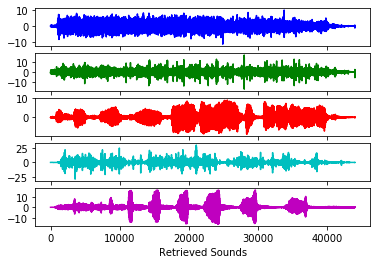

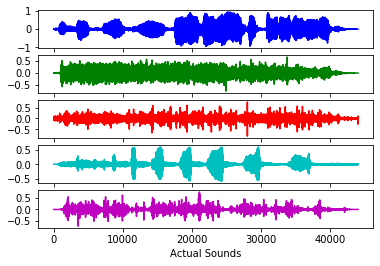

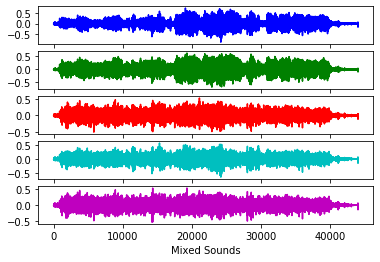

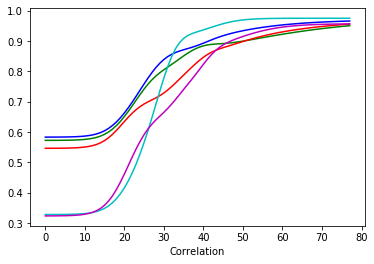

In [122]:
# Test run 1 
ica = ICA(sounds)
ica.do_ICA(0.000005, 500)
ica.plotsignals()

print("Done!!")